## Задача 2.1

Пусть задано два вектора ответов: $y$ — истинный вектор ответов для некоторой выборки, а также есть вектор ответов $\hat{y}$ - некоторой предсказательной модели. Наблюдатель хочет проверить гипотезу о том, что ровно в 25% случаев модель дает заниженные оценки. 
Предложите метод проверки данной гипотезы: запишите задачу формально, 
предложите статистику для решения данной задачи на уровне значимости alpha = 0.05.
Также найдите зависимость мощности данного критерия в зависимости от истинного
процента заниженных ответов.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)





# *  Построение критерия

Построим выборку $X^n = (X_1, \ldots, X_n)$, где $X_i = 1$, если $\hat{y}_i < y_i$, иначе $X_i = 0$. Следовательно $X \sim Ber(p)$. Воспользуемся биномиальным критерием:

Нулевая гипотеза $H_0: p = p_0$

Альтернативная гипотеза $H_1: p \not= p_0$

Статистика $T(X^n) = \sum_{i=1}^nX_i$

Нулевое распределение $Bin(n, p_0)$


Чтобы записать достигаемый уровень значимости, введем множество событий, чья вероятность не превосходит вероятности выпадения реализовавшейся статистики $t$. Пусть $I_t = \{i : P(T(X^n) = i) \leq P(T(X^n) = t)\}$. Тогда достигаемый уровень значимости запишется как:

$p_t = \sum_{i\in I_t}P(T(X^n) = i) = \sum_{i\in I_t}C_n^ip_0^i(1 - p_0)^{n-i}$

Таким образом, будем отвергать нулевую гипотезу, если $p_t <= \alpha = 0.05$


* Рассмотрим зависимость мощности критерия от истинного $p$


Определим область принятия альтернативы при заданном $\alpha$: $\Omega_1 = I_{t^*}$, где $t^* = \arg\max_t\{p_t : p_t \leq \alpha\}$.

Тогда мощность критерия: $W(p) = P(T(X^n) \in I_{t^*}|p) = \sum_{i\in I_{t^*}}C_n^ip^i(1 - p)^{n - i}$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import binom
sns.set()

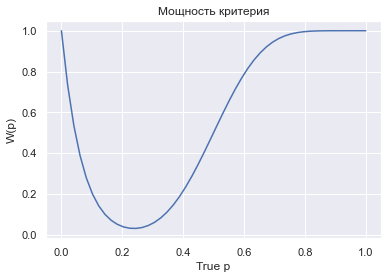

In [2]:
def inside_I(value, t):
    return binom.pmf(value, n, p0) <= binom.pmf(t, n, p0)

def p_value(t):
    return sum([binom.pmf(k, n, p0) for k in range(n + 1) if inside_I(k, t)])


def get_t_star():
    return np.argmax([p_value(t) for t in range(n + 1) if p_value(t) <= alpha])

def W(p):
    t_star = get_t_star()
    return sum([binom.pmf(value, n, p) for value in range(n + 1) if inside_I(value, t_star)])

p0 = 0.25
n = 15
alpha = 0.05

p_range = np.linspace(0, 1)
plt.plot(p_range, [W(p) for p in p_range])
plt.xlabel('True p')
plt.ylabel('W(p)')
plt.title('Мощность критерия')

plt.show()